In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

**loding data in frame**

In [2]:
df1=pd.read_excel(r"data_set.xlsx",sheet_name='Sheet1')
df1.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
df1.shape

(10683, 11)

**Handling NA values**

In [4]:
df1.isnull().sum()


Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [5]:
df2=df1.dropna()
df2.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [6]:
df2.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

**Repacing non-stop attribute by 0**

In [7]:
def change_to_datetime(column):
    df2[column]=pd.to_datetime(df2[column])

In [8]:
df2.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [9]:
for i in ['Date_of_Journey','Dep_Time',"Arrival_Time"]:
    change_to_datetime(i)


In [10]:
df2.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [11]:
df2['journey_day'] = df2['Date_of_Journey'].dt.day
df2['journey_month'] = df2['Date_of_Journey'].dt.month
df2.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2021-07-08 22:20:00,2021-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2021-07-08 05:50:00,2021-07-08 13:15:00,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2021-07-08 09:25:00,2021-06-10 04:25:00,19h,2 stops,No info,13882,6,9
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2021-07-08 18:05:00,2021-07-08 23:30:00,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2021-07-08 16:50:00,2021-07-08 21:35:00,4h 45m,1 stop,No info,13302,3,1


In [12]:
df2.drop('Date_of_Journey', axis=1, inplace=True)
df2.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,2021-07-08 22:20:00,2021-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2021-07-08 05:50:00,2021-07-08 13:15:00,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2021-07-08 09:25:00,2021-06-10 04:25:00,19h,2 stops,No info,13882,6,9
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2021-07-08 18:05:00,2021-07-08 23:30:00,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2021-07-08 16:50:00,2021-07-08 21:35:00,4h 45m,1 stop,No info,13302,3,1


**Extracting hour, minute and dropping the column**

In [13]:
def extract_hour(df,col):
    df[col+'_hour']=df[col].dt.hour
    
def extract_minuter(df,col):
    df[col+'_minute']=df[col].dt.minute

def extract_column(df,col):
    df.drop(col,axis=1,inplace=True)

In [14]:
extract_hour(df2,'Dep_Time')
extract_minuter(df2,'Dep_Time')

extract_hour(df2,'Arrival_Time')
extract_minuter(df2,'Arrival_Time')

In [15]:
extract_column(df2,'Dep_Time')
extract_column(df2,'Arrival_Time')

In [16]:
df2.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35


In [17]:
duration =list(df2['Duration'])

In [18]:
for i in range(len(duration)):
    if len(duration[i].split(' ')) == 2:
        pass
    else:
        if 'h' in duration[i]:
            duration[i] = duration[i] + ' 0m'
        else:
            duration[i] = '0h ' + duration[i] 

In [19]:
df2['Duration']=duration
df2.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35


**seperating minute and hour from duration**

In [20]:
def hour(x):
    return x.split(' ')[0][:-1]

def minute(x):
    return x.split(' ')[1][:-1]

In [21]:
df2['Duration_hour']=df2['Duration'].apply(hour)
df2['Duration_minute']=df2['Duration'].apply(minute)

In [22]:
df2.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hour,Duration_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15,7,25


In [23]:
df2.drop('Duration',axis=1,inplace=True)

In [24]:
df2.head(1)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hour,Duration_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50


In [25]:
df2.dtypes

Airline                object
Source                 object
Destination            object
Route                  object
Total_Stops            object
Additional_Info        object
Price                   int64
journey_day             int64
journey_month           int64
Dep_Time_hour           int64
Dep_Time_minute         int64
Arrival_Time_hour       int64
Arrival_Time_minute     int64
Duration_hour          object
Duration_minute        object
dtype: object

In [26]:
df2['Duration_hour'] = df2['Duration_hour'].astype(int)
df2['Duration_minute'] = df2['Duration_minute'].astype(int)

In [27]:
df2.dtypes

Airline                object
Source                 object
Destination            object
Route                  object
Total_Stops            object
Additional_Info        object
Price                   int64
journey_day             int64
journey_month           int64
Dep_Time_hour           int64
Dep_Time_minute         int64
Arrival_Time_hour       int64
Arrival_Time_minute     int64
Duration_hour           int32
Duration_minute         int32
dtype: object

**fetching object column**

In [28]:
cat_col=[col for col in df2.columns if df2[col].dtype=='O']
cat_col

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']

In [29]:
categorical_data=df2[cat_col]
categorical_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info


### Performing one hot encoding on Airline Column

<AxesSubplot:xlabel='Airline', ylabel='Price'>

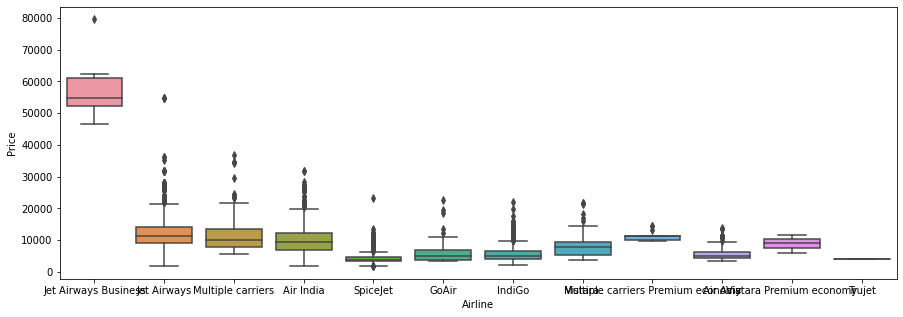

In [30]:
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(15,5))
sn.boxplot(x='Airline',y='Price',data=df2.sort_values('Price',ascending=False))

<AxesSubplot:xlabel='Total_Stops', ylabel='Price'>

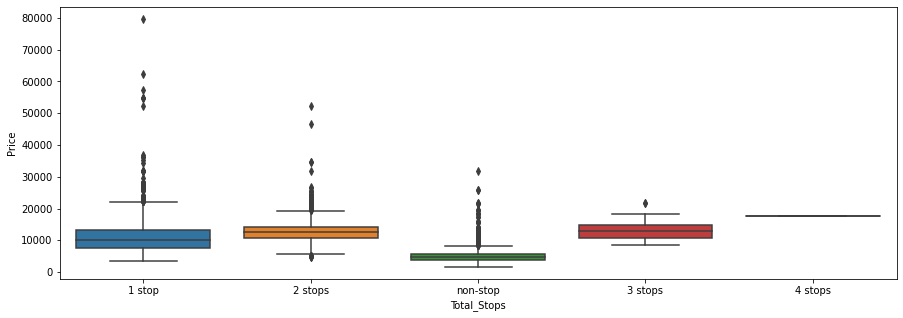

In [31]:
plt.figure(figsize=(15,5))
sn.boxplot(x='Total_Stops',y='Price',data=df2.sort_values('Price',ascending=False))

In [32]:
Airline=pd.get_dummies(categorical_data['Airline'],drop_first=True)
Airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


### Performing One hot encoding in Soruce Column

In [33]:
Source=pd.get_dummies(categorical_data['Source'],drop_first=True)
Source.head()

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


### Performing One hot encoding in destination Column

In [34]:
Destination=pd.get_dummies(categorical_data['Destination'],drop_first=True)
Destination.head()

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


### Handling Route column

In [35]:
categorical_data['Route_01'] = categorical_data['Route'].str.split('→').str[0]
categorical_data['Route_02'] = categorical_data['Route'].str.split('→').str[1]
categorical_data['Route_03'] = categorical_data['Route'].str.split('→').str[2]
categorical_data['Route_04'] = categorical_data['Route'].str.split('→').str[3]
categorical_data['Route_05'] = categorical_data['Route'].str.split('→').str[4]

In [36]:
categorical_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Route_01,Route_02,Route_03,Route_04,Route_05
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,BLR,NAG,DEL,NaN,NaN


In [37]:
categorical_data.drop('Route', axis = 1 , inplace = True)



In [38]:
categorical_data.isnull().sum()

Airline                0
Source                 0
Destination            0
Total_Stops            0
Additional_Info        0
Route_01               0
Route_02               0
Route_03            3491
Route_04            9116
Route_05           10636
dtype: int64

In [39]:
for i in ['Route_03','Route_04','Route_05']:
    categorical_data[i].fillna('None',inplace=True)


In [40]:
categorical_data.isnull().sum()

Airline            0
Source             0
Destination        0
Total_Stops        0
Additional_Info    0
Route_01           0
Route_02           0
Route_03           0
Route_04           0
Route_05           0
dtype: int64

In [41]:
categorical_data.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Route_01,Route_02,Route_03,Route_04,Route_05
0,IndiGo,Banglore,New Delhi,non-stop,No info,BLR,DEL,None,None,None
1,Air India,Kolkata,Banglore,2 stops,No info,CCU,IXR,BBI,BLR,None
2,Jet Airways,Delhi,Cochin,2 stops,No info,DEL,LKO,BOM,COK,None
3,IndiGo,Kolkata,Banglore,1 stop,No info,CCU,NAG,BLR,None,None
4,IndiGo,Banglore,New Delhi,1 stop,No info,BLR,NAG,DEL,None,None


In [42]:
for i in categorical_data.columns:
    print('{} has total {} categories'.format(i,len(categorical_data[i].value_counts())))

Airline has total 12 categories
Source has total 5 categories
Destination has total 6 categories
Total_Stops has total 5 categories
Additional_Info has total 10 categories
Route_01 has total 5 categories
Route_02 has total 45 categories
Route_03 has total 30 categories
Route_04 has total 14 categories
Route_05 has total 6 categories


In [43]:
categorical_data.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
       'Route_01', 'Route_02', 'Route_03', 'Route_04', 'Route_05'],
      dtype='object')

In [44]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [45]:
for i in ['Route_01','Route_02','Route_03','Route_04','Route_05']:
    categorical_data[i]=encoder.fit_transform(categorical_data[i])

In [46]:
categorical_data.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Route_01,Route_02,Route_03,Route_04,Route_05
0,IndiGo,Banglore,New Delhi,non-stop,No info,0,13,29,13,5
1,Air India,Kolkata,Banglore,2 stops,No info,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,2 stops,No info,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,1 stop,No info,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,1 stop,No info,0,34,8,13,5


In [47]:
categorical_data['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [48]:
categorical_data['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [49]:
dict_route={'non-stop':0,
            '1 stops':1,
           '2 stops':2,
           '3 stops':3,
           '4 stops':4,}

dict_route

{'non-stop': 0, '1 stops': 1, '2 stops': 2, '3 stops': 3, '4 stops': 4}

In [50]:
categorical_data['Total_Stops']=categorical_data['Total_Stops'].map(dict_route)
categorical_data.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Route_01,Route_02,Route_03,Route_04,Route_05
0,IndiGo,Banglore,New Delhi,0.0,No info,0,13,29,13,5
1,Air India,Kolkata,Banglore,2.0,No info,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,2.0,No info,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,NaN,No info,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,NaN,No info,0,34,8,13,5


In [73]:
df2=pd.concat([categorical_data,Airline,Source,Destination,df2[cat_col]],axis='columns')
df2.head()

KeyError: "['Route', 'Additional_Info'] not in index"

In [51]:
df2.drop(['Airline', 'Source', 'Destination'], axis = 1, inplace = True)


In [52]:
df2.head()

,Route,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hour,Duration_minute
0,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,5,50,13,15,7,25
2,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,9,25,4,25,19,0
3,CCU → NAG → BLR,1 stop,No info,6218,5,12,18,5,23,30,5,25
4,BLR → NAG → DEL,1 stop,No info,13302,3,1,16,50,21,35,4,45


### to see all columns

In [53]:
pd.set_option('display.max_columns',35)
df2.head()

,Route,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hour,Duration_minute
0,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,5,50,13,15,7,25
2,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,9,25,4,25,19,0
3,CCU → NAG → BLR,1 stop,No info,6218,5,12,18,5,23,30,5,25
4,BLR → NAG → DEL,1 stop,No info,13302,3,1,16,50,21,35,4,45


**Building a model**

In [ ]:
X = df6.drop(['Price'],axis='columns')
X.head()

In [ ]:
X.shape

In [ ]:
y=df8.Price
y.head()

In [ ]:
len(y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=7)


In [ ]:
from sklearn.linear_model import LinearRegression
lr_clf=LinearRegression()
lr_clf.fit(X_train,y_train)


In [ ]:
lr_clf.score(X_test,y_test)

**using k FOld cross vallidation for measuring accuracy of linear Regression model**

In [ ]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv=ShuffleSplit(n_splits=5,test_size=0.1, random_state=7)

cross_val_score(LinearRegression(),X,y, cv=cv)

**finding best model using GridSearchCV**

In [ ]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=7)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

**from above gridCv decisiontreeRegressor is the best model**

In [ ]:
from sklearn import tree
model = tree.DecisionTreeRegressor(splitter='best',criterion='mse')
model.fit(X_train,y_train)
model.score(X_test,y_test)

**testing model for few properties**

In [ ]:
import numpy as np
def predict_price(Airline,Source,Destination,Stops):    
    loc_index = np.where(X.columns==Airline)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = Source
    x[1] = Destination
    x[2] = Stops
    if loc_index >= 0:
        x[loc_index] = 1

    return model.predict([x])[0]

In [ ]:
predict_price('Air India',3, 2, 2)

In [ ]:
predict_price('Air India',3, 4,2)